# Methods for E-M

In [50]:
def e_step (theta,y):
    '''Expectation Step'''
    keys = set()
    ez = {}
    
    # Initialise 't1', 't2', 't3' keys
    for key, val in theta.items():
        keys.add(key)
        ez[key] = []
    
    # For each read
    for r in range(len(y['t1'])):
        
        # Denominator: Sum of all proportions
        #  over each transcript
        den = 0
        for i in keys:
            den += theta[i]*y[i][r]
        
        # Score: proportion of a transcript * reads that can map to it
        #  divided by Denominator (sum of all proportions).
        for i in keys:
            ez[i].append(theta[i]*y[i][r]/den)
            
    return(ez)

In [9]:
def m_step(ez):
    '''Maximisation Step'''
    keys = set()
    ny = {}
    
    # Initialise 't1', 't2', 't3' keys
    for key, val in ez.items():
        keys.add(key)
    
    # New proportions = Average of all read expectations
    #  for that transcript
    for i in keys:
        ny[i]= sum(ez[i])/6
    
    return(ny)

In [51]:
# Pretty printing (ignore!)
def pretty(dic):
    for i in ['t1','t2','t3']:
        print(i, (
            '\t'.join(['%.3f' % x for x in dic[i]])) 
              if (not(isinstance(dic[i], float))) 
              else '%.3f' % dic[i], sep='\t')


In [169]:
from __future__ import division
from math import sqrt
from matplotlib import pyplot as plt
from time import sleep

def drawPie(cth):
    cth_nr = [cth['t1'],cth['t2'],cth['t3']]
    colors = ['red','blue','green']
    plt.pie(cth_nr,colors=colors)
    plt.axis('equal')
    plt.show()


def runOneEMstep():
    global rounds, cth, y
    rounds = rounds + 1
    print("\n\n[ Round", rounds,"]")

    # Compute Expectations
    expz = e_step(cth,y)
    
    # Maximise
    cth = m_step(expz)

    print("Expectation of Observed Reads")
    pretty(expz)
    print("\nMaximisation of Transcript Abundances")
    pretty(cth)
    
    drawPie(cth)


# If abundances converge, run this
# to get the final transcript abundances
def giveFinalAbundances():
    global cth
    print("Final ")
    for i in ['t1','t2','t3']:
        print(i, "%.3f" % (cth[i]*6))


# Performing the E-M

Consider the following 6 reads being mapped to 3 transcripts

 ![Image2](https://drive.google.com/uc?id=1v3qHXWaZrn-41C3kAM3gyrPp010oqUhp)
 

Initial Responsibilities
t1	1.000	0.000	0.000	1.000	1.000	1.000
t2	0.000	1.000	1.000	0.000	0.000	1.000
t3	0.000	1.000	1.000	1.000	0.000	1.000

Initial Transcript Proportions
t1	0.375
t2	0.250
t3	0.375


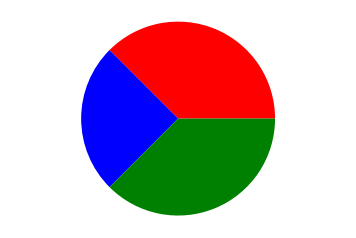

In [184]:
# - Overlap matrix
y = {
    't1':[1,0,0,1,1,1],
    't2':[0,1,1,0,0,1],
    't3':[0,1,1,1,0,1]
}

# - Randomly seeded transcript abundances → sum to 1
cth = {
    't1':3/8,
    't2':2/8,
    't3':3/8
}

rounds = 0 # reset

print("Initial Responsibilities")
pretty(y)
print("\nInitial Transcript Proportions")
pretty(cth)

drawPie(cth)



[ Round 1 ]
Expectation of Observed Reads
t1	1.000	0.000	0.000	0.500	1.000	0.375
t2	0.000	0.400	0.400	0.000	0.000	0.250
t3	0.000	0.600	0.600	0.500	0.000	0.375

Maximisation of Transcript Abundances
t1	0.479
t2	0.175
t3	0.346


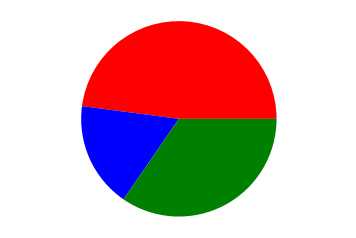

In [185]:
runOneEMstep()



[ Round 2 ]
Expectation of Observed Reads
t1	1.000	0.000	0.000	0.581	1.000	0.479
t2	0.000	0.336	0.336	0.000	0.000	0.175
t3	0.000	0.664	0.664	0.419	0.000	0.346

Maximisation of Transcript Abundances
t1	0.510
t2	0.141
t3	0.349


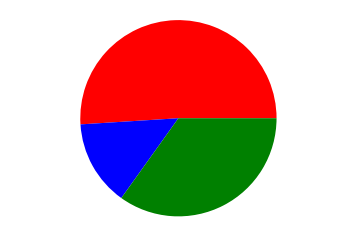

In [186]:
runOneEMstep()



[ Round 3 ]
Expectation of Observed Reads
t1	1.000	0.000	0.000	0.594	1.000	0.510
t2	0.000	0.288	0.288	0.000	0.000	0.141
t3	0.000	0.712	0.712	0.406	0.000	0.349

Maximisation of Transcript Abundances
t1	0.517
t2	0.120
t3	0.363


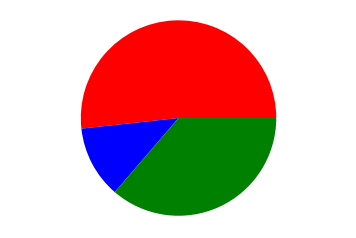

In [187]:
runOneEMstep()



[ Round 4 ]
Expectation of Observed Reads
t1	1.000	0.000	0.000	0.588	1.000	0.517
t2	0.000	0.248	0.248	0.000	0.000	0.120
t3	0.000	0.752	0.752	0.412	0.000	0.363

Maximisation of Transcript Abundances
t1	0.517
t2	0.102
t3	0.380


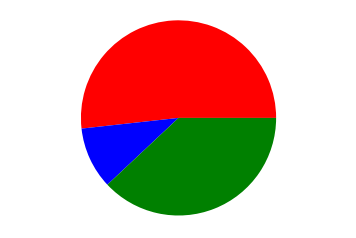

In [188]:
runOneEMstep()



[ Round 5 ]
Expectation of Observed Reads
t1	1.000	0.000	0.000	0.577	1.000	0.517
t2	0.000	0.212	0.212	0.000	0.000	0.102
t3	0.000	0.788	0.788	0.423	0.000	0.380

Maximisation of Transcript Abundances
t1	0.516
t2	0.088
t3	0.396


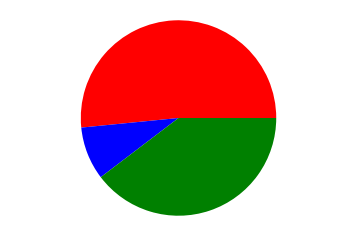

In [189]:
runOneEMstep()



[ Round 6 ]
Expectation of Observed Reads
t1	1.000	0.000	0.000	0.565	1.000	0.516
t2	0.000	0.181	0.181	0.000	0.000	0.088
t3	0.000	0.819	0.819	0.435	0.000	0.396

Maximisation of Transcript Abundances
t1	0.514
t2	0.075
t3	0.411


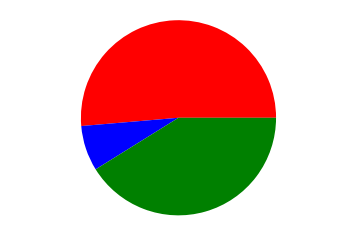

In [190]:
runOneEMstep()



[ Round 7 ]
Expectation of Observed Reads
t1	1.000	0.000	0.000	0.555	1.000	0.514
t2	0.000	0.154	0.154	0.000	0.000	0.075
t3	0.000	0.846	0.846	0.445	0.000	0.411

Maximisation of Transcript Abundances
t1	0.511
t2	0.064
t3	0.425


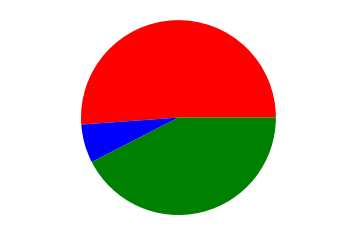

In [191]:
runOneEMstep()



[ Round 8 ]
Expectation of Observed Reads
t1	1.000	0.000	0.000	0.546	1.000	0.511
t2	0.000	0.131	0.131	0.000	0.000	0.064
t3	0.000	0.869	0.869	0.454	0.000	0.425

Maximisation of Transcript Abundances
t1	0.510
t2	0.054
t3	0.436


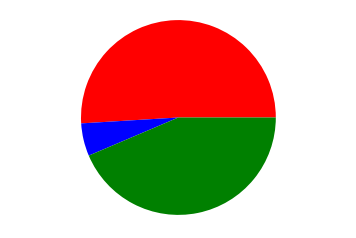

In [192]:
runOneEMstep()



[ Round 9 ]
Expectation of Observed Reads
t1	1.000	0.000	0.000	0.539	1.000	0.510
t2	0.000	0.111	0.111	0.000	0.000	0.054
t3	0.000	0.889	0.889	0.461	0.000	0.436

Maximisation of Transcript Abundances
t1	0.508
t2	0.046
t3	0.446


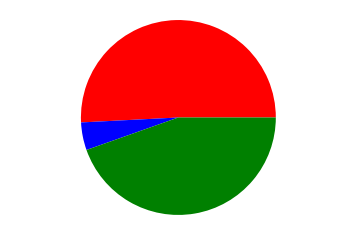

In [193]:
runOneEMstep()



[ Round 10 ]
Expectation of Observed Reads
t1	1.000	0.000	0.000	0.533	1.000	0.508
t2	0.000	0.093	0.093	0.000	0.000	0.046
t3	0.000	0.907	0.907	0.467	0.000	0.446

Maximisation of Transcript Abundances
t1	0.507
t2	0.039
t3	0.454


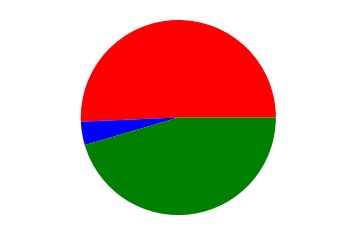

In [194]:
runOneEMstep()



[ Round 11 ]
Expectation of Observed Reads
t1	1.000	0.000	0.000	0.527	1.000	0.507
t2	0.000	0.079	0.079	0.000	0.000	0.039
t3	0.000	0.921	0.921	0.473	0.000	0.454

Maximisation of Transcript Abundances
t1	0.506
t2	0.033
t3	0.462


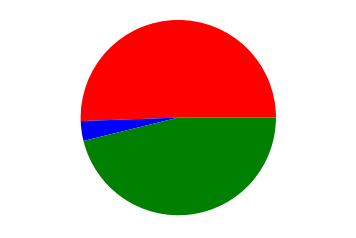

In [195]:
runOneEMstep()



[ Round 12 ]
Expectation of Observed Reads
t1	1.000	0.000	0.000	0.523	1.000	0.506
t2	0.000	0.066	0.066	0.000	0.000	0.033
t3	0.000	0.934	0.934	0.477	0.000	0.462

Maximisation of Transcript Abundances
t1	0.505
t2	0.028
t3	0.468


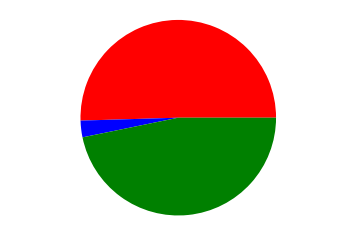

In [196]:
runOneEMstep()



[ Round 13 ]
Expectation of Observed Reads
t1	1.000	0.000	0.000	0.519	1.000	0.505
t2	0.000	0.056	0.056	0.000	0.000	0.028
t3	0.000	0.944	0.944	0.481	0.000	0.468

Maximisation of Transcript Abundances
t1	0.504
t2	0.023
t3	0.473


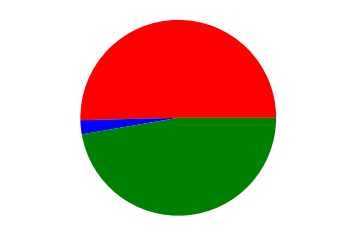

In [197]:
runOneEMstep()



[ Round 14 ]
Expectation of Observed Reads
t1	1.000	0.000	0.000	0.516	1.000	0.504
t2	0.000	0.047	0.047	0.000	0.000	0.023
t3	0.000	0.953	0.953	0.484	0.000	0.473

Maximisation of Transcript Abundances
t1	0.503
t2	0.019
t3	0.477


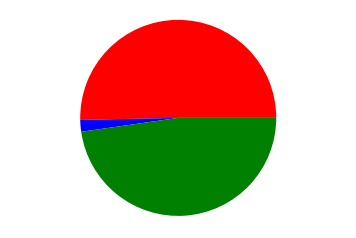

In [198]:
runOneEMstep()



[ Round 15 ]
Expectation of Observed Reads
t1	1.000	0.000	0.000	0.513	1.000	0.503
t2	0.000	0.039	0.039	0.000	0.000	0.019
t3	0.000	0.961	0.961	0.487	0.000	0.477

Maximisation of Transcript Abundances
t1	0.503
t2	0.016
t3	0.481


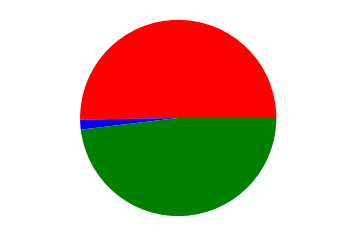

In [199]:
runOneEMstep()



[ Round 16 ]
Expectation of Observed Reads
t1	1.000	0.000	0.000	0.511	1.000	0.503
t2	0.000	0.033	0.033	0.000	0.000	0.016
t3	0.000	0.967	0.967	0.489	0.000	0.481

Maximisation of Transcript Abundances
t1	0.502
t2	0.014
t3	0.484


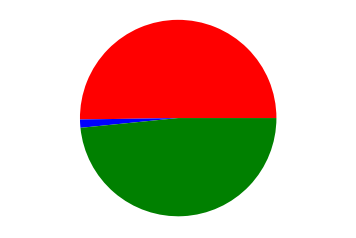

In [200]:
runOneEMstep()



[ Round 17 ]
Expectation of Observed Reads
t1	1.000	0.000	0.000	0.509	1.000	0.502
t2	0.000	0.027	0.027	0.000	0.000	0.014
t3	0.000	0.973	0.973	0.491	0.000	0.484

Maximisation of Transcript Abundances
t1	0.502
t2	0.011
t3	0.487


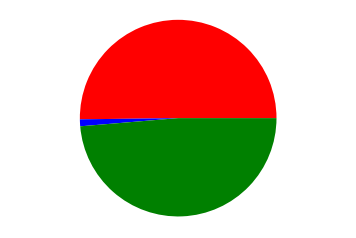

In [201]:
runOneEMstep()



[ Round 18 ]
Expectation of Observed Reads
t1	1.000	0.000	0.000	0.508	1.000	0.502
t2	0.000	0.023	0.023	0.000	0.000	0.011
t3	0.000	0.977	0.977	0.492	0.000	0.487

Maximisation of Transcript Abundances
t1	0.502
t2	0.009
t3	0.489


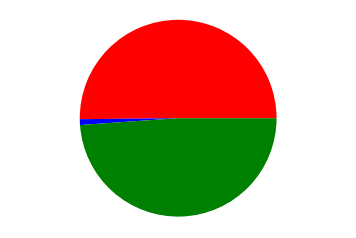

In [202]:
runOneEMstep()

In [204]:
# Converged, give final abundances
giveFinalAbundances()

Final 
t1 3.010
t2 0.057
t3 2.933
